# **Practical assigment for Topic 6**

Student_Name : Yasir Ahmed Siddiqui
Student_id : 241ADM037

Our imports.

In [ ]:
# Do not modify this code

import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, r2_score

Our dataset.

In [ ]:
# Do not modify this code

np.random.seed(42)
n = 100
X = 6 * np.random.rand(n, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(n, 1)

Create KNN model.

In [ ]:
knn = KNeighborsRegressor(n_neighbors=10)
#knn = KNeighborsRegressor(n_neighbors=10, weights='distance') # try weighted version as well
knn.fit(X, y)

KNeighborsRegressor(n_neighbors=10)

Plot the model.

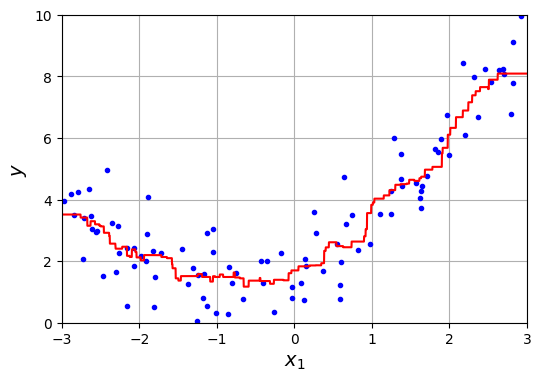

In [ ]:
# Do not modify this code

X_plot = np.linspace(-3, 3, 5000).reshape(5000, 1)
yHat = knn.predict(X_plot)

plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.plot(X_plot, yHat, "r-")
plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$y$", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.grid()
plt.show()

Evaluate the model using Cross-Validation.

In [ ]:
# Do not modify this code

yHat = cross_val_predict(knn, X, y, cv=10)

print('MAE: ', mean_absolute_error(y, yHat))
print('MSE: ', mean_squared_error(y, yHat))
print('RMSE:', root_mean_squared_error(y, yHat))
print('R2:  ', r2_score(y, yHat))

MAE:  0.7811714259928344
MSE:  0.98228031311966
RMSE: 0.9911005565126376
R2:   0.8135860851695909


## **Task 1**

Create your own implementation of KNN which should output the same predictions for any k as the one implemented in scikit-learn library. Implement both, distance-weighted and unweighted KNN. The function should work correctly for any number of features, training set sizes, and query list set sizes.

*In the code of `predict()` you are allowed to use only the **numpy** library, i.e., you are **not allowed** to use **scikit-learn**.*

*You are **not allowed** to modify any given code in this class. You may only add additional code to the `predict()` function.*

Create a KNN model using the newly implemented class.

In [ ]:
#import BaseEstimator for inheritance
import numpy as np
from sklearn.base import BaseEstimator

#define our new class for KNN
class KNN(BaseEstimator):
    #initialization function for setting KNN parameters
    def __init__(self, k=10, weighted=False):
        self.k = k
        self.weighted = weighted
    #function for "fitting" our model. no actual fitting is done because this is KNN
    def fit(self, X, y):
        self.X = X
        self.y = y
    #function for prediction where the actual work is happening
    def predict(self, Xq):
       #the number of query data points
        n = len(Xq)
       #the array which we will fill with predicted values
        yHat = np.zeros(n)
       #loop through all query points. q is query index
        for q in range(n):
           #one current query point for which we will do prediction
            xquery = Xq[q, :]
            #compute distances from the query point to all training data points
            distances = np.sqrt(np.sum((self.X - xquery) ** 2, axis=1))
            #find k nearest neighbors using the computed distances
            nearest_neighbors = np.argsort(distances)[:self.k]
            if self.weighted:
               #Calculate weights as the inverse of distances for the nearest neighbors
                weights = 1 / distances[nearest_neighbors]
                #Compute the weighted sum of the target values of the nearest neighbors
                #and normalize by the sum of the weights to get the predicted value (yHat) for query q
                yHat[q] = np.sum(self.y[nearest_neighbors].ravel() * weights) / np.sum(weights)
            else:
                #Code for the non-weighted case would follow here
                yHat[q] = np.mean(self.y[nearest_neighbors])
        return yHat

# Define the data (X and y)
np.random.seed(42)
n = 100
X = 6 * np.random.rand(n, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(n, 1)

# Initialize and fit the KNN model
my_knn = KNN(k=10)
my_knn.fit(X, y)

In [ ]:
my_knn = KNN(k=10)
#my_knn = KNN(k=10, weighted=True) # try weighted version as well
my_knn.fit(X, y)

Plot it.

*Note that the plot should be exactly the same as that what you got when you used the scikit-learn function `KNeighborsRegressor`. Compare the plots and, if they are not the same, correct your code.*

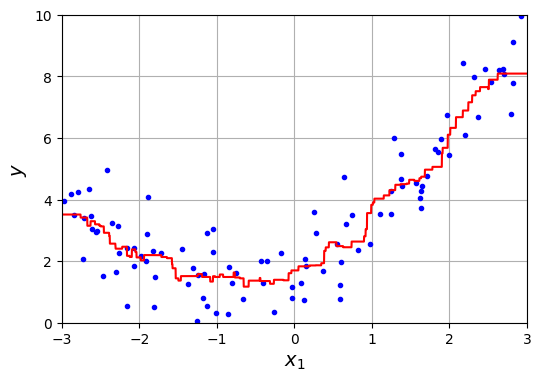

In [ ]:
# Do not modify this code

X_plot = np.linspace(-3, 3, 5000).reshape(5000, 1)
yHat = my_knn.predict(X_plot)

plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.plot(X_plot, yHat, "r-")
plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$y$", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.grid()
plt.show()

Evaluate it.

*Note that the evaluation result should be exactly the same as that what you got when you used the scikit-learn function `KNeighborsRegressor`. Compare the results and, if they are not the same, correct your code.*

In [ ]:
# Do not modify this code
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score

yHat = cross_val_predict(my_knn, X, y, cv=10)

print('MAE: ', mean_absolute_error(y, yHat))
print('MSE: ', mean_squared_error(y, yHat))
print('RMSE:', np.sqrt(mean_squared_error(y, yHat)))
print('R2:  ', r2_score(y, yHat))

MAE:  0.7811714259928344
MSE:  0.98228031311966
RMSE: 0.9911005565126376
R2:   0.8135860851695909


## **Task 2**

Use the `KNeighborsRegressor` class to try KNN with k values from 1 to 20. Compute and print training MSE and cross-validated MSE values for each k. Cross-validation should be done using `cross_val_predict()`. Draw a plot with two curves analogous to the plot shown in **slide 16 on the right** from today's lecture. Add a legend so that it is clear which curve is which.

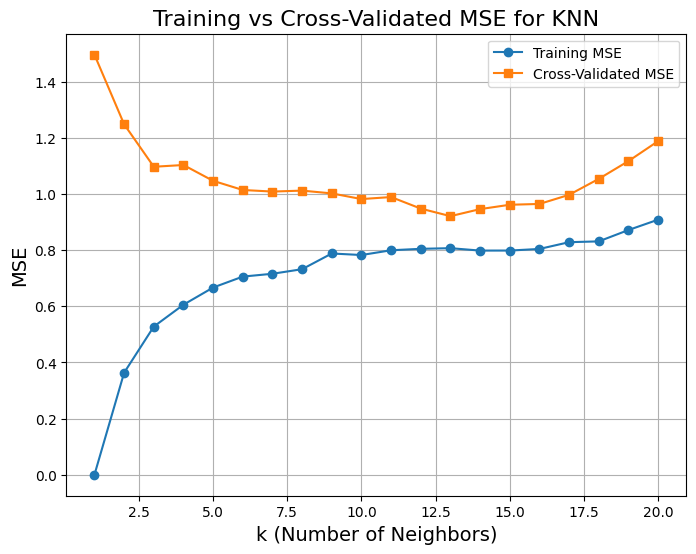

In [ ]:
# Your code goes here
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_predict

# Generate sample data
np.random.seed(42)
n = 100
X = 6 * np.random.rand(n, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(n, 1)

# Store training and cross-validated MSE values
training_mse = []
cross_val_mse = []

# Try k values from 1 to 20
k_values = range(1, 21)

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X, y)

    # Predictions for training data
    y_train_pred = knn.predict(X)
    training_mse.append(mean_squared_error(y, y_train_pred))

    # Cross-validated predictions
    y_cv_pred = cross_val_predict(knn, X, y, cv=10)
    cross_val_mse.append(mean_squared_error(y, y_cv_pred))

# Plotting the training and cross-validation curves
plt.figure(figsize=(8, 6))
plt.plot(k_values, training_mse, label="Training MSE", marker='o')
plt.plot(k_values, cross_val_mse, label="Cross-Validated MSE", marker='s')
plt.xlabel('k (Number of Neighbors)', fontsize=14)
plt.ylabel('MSE', fontsize=14)
plt.title('Training vs Cross-Validated MSE for KNN', fontsize=16)
plt.legend()
plt.grid(True)
plt.show()



## **Task 3**
Explain the plot from Task 2. What exactly do we see in it and what conclusions can we make from it?

*Your answer goes here.*

In the plot, we can see how the Mean Squared Error (MSE) changes for both the
training data and the cross-validated predictions as we adjust the number of neighbors, k.

Training MSE (blue line):

When k is small, especially at k=1, the training MSE is very low. This suggests that the model is overfitting, as it predicts the training data almost perfectly.

As we increase k, the training MSE goes up. This is because the model becomes smoother and less sensitive to individual data points, which helps reduce overfitting.

Cross-Validated MSE (orange line):

At very small values of k, the cross-validated MSE is high, indicating that the model doesn't generalize well due to overfitting.

As k increases, the cross-validated MSE decreases and eventually hits a minimum, where the model finds a good balance between underfitting and overfitting.

However, if k becomes too large, the model starts to underfit, causing the cross-validated MSE to rise again.

Conclusion:
The plot illustrates the bias-variance tradeoff:

With a small k, the model has high variance and low bias, leading to overfitting.

With a large k, the model has high bias and low variance, leading to underfitting.

The best choice for k is where the cross-validated MSE is at its lowest, indicating an optimal balance.







---
**After the tasks are done, submit this file. Do not clear it's output - all print-outs and diagrams should be left in the file.**